In [1]:
#ch10_01_Cifar.ipynb
#以keras建立Convolution Neural Network, CNN model
#以訓練資料集 fit model,評估model準確率
#以fit完成的model辨識 cifar-10 影像資料集

In [2]:
#step0. CNN,Convolutional Neural Network 簡介
#
#step0.1 CNN可分為2大部分: 1.影像特徵提取 2.完全連結神經網路
#        1.影像特徵提取:卷積層1,池化層1,卷積層2,池化層2
#        2.完全連結神經網路: 平坦層(Flatten),隱藏層,輸出層

In [3]:
#step1. Data Preprocess
#cifar-10 Data Preprocess ==> ch09_01_Cifar_Intro.ipynb

In [4]:
#step1.1 import necessary module
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [5]:
#step1.2 讀取 cifar-10 資料
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [6]:
#step1.3 檢視 train/test dataset
print("train data x_img_train:",x_img_train.shape," train data y_label_train:",y_label_train.shape)
print("test data x_img_test:",x_img_test.shape," test data y_label_test:",y_label_test.shape)

train data x_img_train: (50000, 32, 32, 3)  train data y_label_train: (50000, 1)
test data x_img_test: (10000, 32, 32, 3)  test data y_label_test: (10000, 1)


In [7]:
#step1.4 將features (影像資料) 標準化
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0

In [8]:
#step1.5 將labels (影像值 [0],[1],...,[9]) Onehot encoding 編碼
#        以np_utils.to_categorical()
from keras.utils import np_utils

In [9]:
y_label_train_OneHot=np_utils.to_categorical(y_label_train)
y_label_test_OneHot=np_utils.to_categorical(y_label_test)

In [10]:
#==============================================================
#step2. 建立模型
#

In [11]:
#step2.1 import necessary module
from keras.models import Sequential #keras Sequential module, https://keras.io/getting-started/sequential-model-guide/
from keras.layers import Dense, Dropout, Activation, Flatten #keras layers module: Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D

In [12]:
#step2.2 建立 keras的 Sequential model
model=Sequential()

In [13]:
#step2.3 建立卷積層1與池化層1, 以model.add()
#        a.fiters=32 --> 隨機產生32個濾鏡, b.size=(3,3) --> 每個濾鏡大小是 (3x3)
#        c.padding='same' -->設定此卷積運算不改變大小, d.activation='relu' activation function 為'ReLU'
#step2.3.1 建立卷積層1, Conv2D()
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same'))

In [14]:
#step2.3.2 加入Dropoup層,避免 Overfitting, Dropout()
model.add(Dropout(rate=0.25))# 脫落率為0.25

In [15]:
#step2.3.3 建立池化層1, MaxPooling2D, pool_size=(2,2) 縮減取樣,將32x32的影像縮小為16x16,影像數量仍是32個
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
#step2.4 建立卷積層2與池化層2
#step2.4.1 建立第2次卷積層, Conv2D(), filters=64 (64個濾鏡)
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

In [17]:
#step2.4.2 再加入 Dropout 避免 overfitting  
model.add(Dropout(0.25))

In [18]:
#step2.4.3 建立池化層2, pool_size=(2,2),執行第二次縮減取樣,將16x16的影像縮小為8x8,影像數量仍為64個
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
#============================================================================================
#step2.5 建立神經網路(平坦層、隱藏層、輸出層)

In [20]:
#step2.5.1 建立平坦層, Flatten, 將step2.4.3 池化層2 (64x8x8) 轉化為1維向量 4096 個 float (4096個神經元)
#          並加入一個「脫線層」Dorpout, 隨機脫線(放棄) 25% 的神經元(rate=0.25), 用以避免 overfitting
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [21]:
#step2.5.2 建立一個1024個神經元的隱藏層,使用 Dense(), activation function為 'ReLU'
#          同樣加入一個「脫線層」Dorpout, 隨機脫線(放棄) 25% 的神經元(rate=0.25), 用以避免 overfitting
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

In [22]:
#step2.5.3 建立輸出層,共10個神經元,對應到0~9共10個影像類別
#          activateion function 為 softmax()
model.add(Dense(10,activation='softmax'))

In [23]:
#==================================================================================
#step2.6 檢視模型的摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [25]:
#===================================================================
#step3. 進行訓練
#step3.1 定義訓練方式, 使用model.compile() method
#        loss function --> 'crossentropy'(交叉墒) | optimizer --> 'adam' | metrics(評估方式) --> accuracy 
#        訓練方法說明: tf_ch03_01_linearRegression.py
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
#step3.2 開始訓練並記錄,
#        關於模型評估與改善-->A_ch05_001_Evalution.ipynb (ML 4.11)
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,  #train dataset
                        validation_split=0.2,                        #有20%的 validation data
                        epochs=10,                                   #訓練週期=10(次)
                        batch_size=128,                              #每周期批次量=128
                        verbose=1)                                   #verbose 層級 1 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 79s 2ms/step - loss: 1.5000 - acc: 0.4607 - val_loss: 1.2861 - val_acc: 0.5767
Epoch 2/10
40000/40000 [==============================] - 79s 2ms/step - loss: 1.1416 - acc: 0.5951 - val_loss: 1.1031 - val_acc: 0.6372
Epoch 3/10
40000/40000 [==============================] - 78s 2ms/step - loss: 0.9839 - acc: 0.6546 - val_loss: 1.0086 - val_acc: 0.6670
Epoch 4/10
40000/40000 [==============================] - 77s 2ms/step - loss: 0.8777 - acc: 0.6914 - val_loss: 0.9407 - val_acc: 0.6943
Epoch 5/10
40000/40000 [==============================] - 77s 2ms/step - loss: 0.7874 - acc: 0.7234 - val_loss: 0.8898 - val_acc: 0.7071
Epoch 6/10
40000/40000 [==============================] - 80s 2ms/step - loss: 0.7066 - acc: 0.7501 - val_loss: 0.8389 - val_acc: 0.7202
Epoch 7/10
40000/40000 [==============================] - 77s 2ms/step - loss: 0.6246 - acc: 0.7825 - val_loss: 0.8066 - val_acc

In [27]:
#step3.3 顯示(繪圖)訓練過程
#        讀取 train_history 中 loss 與 accuracy, 繪圖
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):  #define a function 'show_train_history'
    plt.plot(train_history.history[train])              #train_history.history 是一個 dict
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

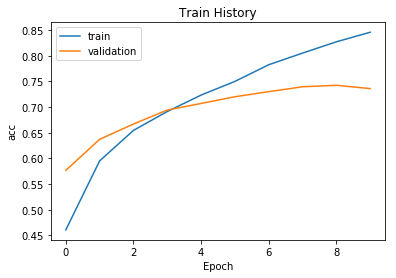

In [28]:
#step3.4 畫出 accuracy 執行結果, 使用 show_train_history
%matplotlib inline
show_train_history(train_history,'acc','val_acc')

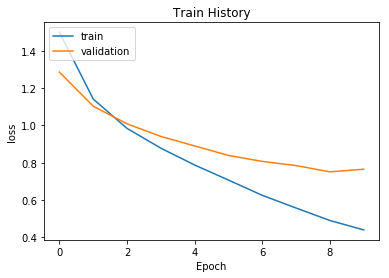

In [29]:
#step3.5 畫出 loss 誤差值
show_train_history(train_history,'loss','val_loss')

In [41]:
#step4. 評估模型準確率, 使用獨立的test資料集 (10000筆),model.evaluate()                     
score=model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=1)

10000/10000 [==============================] - 4s 443us/step


In [42]:
#step4.1 檢視 score
score[1]

0.73409999999999997

In [38]:
model.evaluate?

In [43]:
#====================================================================
#step5. 進行預測, 雖然 model 在 fit 後 準確率僅有 0.73
#       我們還是先拿它來預測看看

In [45]:
#step5.1 執行預測, 以 x_img_test_normalize (1000筆資料), 將預測結果寫到 prediction
#        叫用的是 model.predict_classes() method
prediction=model.predict_classes(x_img_test_normalize)

In [74]:
#step5.2 檢視預測結果(20筆 [100:121]),並對照 y_label_test 的值
print('prediction[10:21]   -->',prediction[100:121])
print('y_label_test[10:21]-->',y_label_test[100:121].reshape(1,-1))

prediction[10:21]   --> [4 5 6 3 1 1 5 6 8 5 4 0 2 2 9 4 0 4 2 5 8]
y_label_test[10:21]--> [[4 5 6 3 1 1 3 6 8 7 4 0 6 2 1 3 0 4 2 7 8]]


In [70]:
#step5.3 繪圖顯示預測結果,
#step5.3.1 定義label_dict
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
           5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
#step5.3.2 定義繪圖函數 plot_images_labels_prediction()
#          !!!這個函數寫得有點問題，稍後改寫!
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

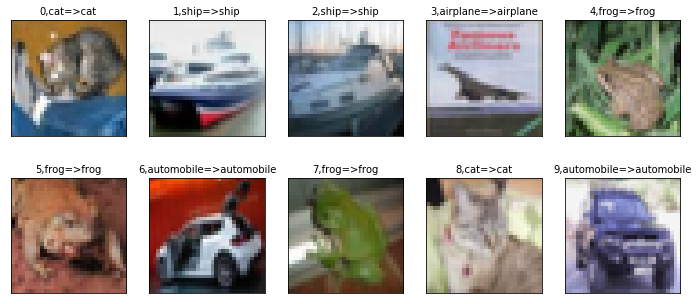

In [75]:
#step5.3.3 以 plot_images_labels_prediction() 顯示其中10筆([10:21])預測值及label值
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [76]:
#=========================================================================================
#step6. 檢視每種類別的預測機率
#step6.1 使用測試資料進行預測, model.predict()
Predicted_Probability=model.predict(x_img_test_normalize)

In [78]:
#step6.2 建立 show_Predicted_Probability() function
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

In [79]:
Predicted_Probability[:10]

array([[  2.95531261e-03,   3.28316097e-03,   1.23255579e-02,
          5.19916594e-01,   2.38914369e-03,   3.78448427e-01,
          5.72649837e-02,   4.35832329e-03,   1.73014104e-02,
          1.75711222e-03],
       [  1.84069632e-03,   1.03921771e-01,   1.41929632e-07,
          8.32867590e-06,   1.36283504e-07,   8.57735643e-07,
          7.60167859e-06,   3.68898312e-09,   8.92089546e-01,
          2.13096198e-03],
       [  1.98961109e-01,   4.20059152e-02,   5.22107491e-03,
          4.04981105e-03,   7.47366482e-03,   1.88362796e-03,
          6.82727143e-04,   1.06920116e-03,   7.00236976e-01,
          3.84159461e-02],
       [  7.80549824e-01,   2.22504605e-03,   2.09023543e-02,
          4.88292775e-04,   2.66764895e-03,   7.37314849e-06,
          6.42201048e-05,   4.54982228e-06,   1.92937717e-01,
          1.52957917e-04],
       [  6.14369640e-08,   8.66357914e-06,   2.60276496e-02,
          1.69532821e-01,   1.04532978e-02,   1.15462739e-04,
          7.93839395e-01

label: automobile predict: automobile


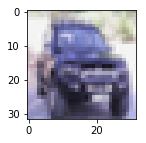

airplane Probability:0.000655117
automobile Probability:0.626807272
bird Probability:0.000169161
cat Probability:0.000184317
deer Probability:0.000026830
dog Probability:0.000352811
frog Probability:0.000613276
horse Probability:0.000006934
ship Probability:0.014549187
truck Probability:0.356635034


In [88]:
#step6.3 檢視第9筆資料預測的機率
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,9)

label: horse predict: dog


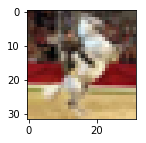

airplane Probability:0.000349176
automobile Probability:0.001151670
bird Probability:0.035414658
cat Probability:0.038448818
deer Probability:0.064927138
dog Probability:0.798778176
frog Probability:0.001143488
horse Probability:0.059477646
ship Probability:0.000083357
truck Probability:0.000225883


In [89]:
#step6.3 檢視第119筆資料預測的機率
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,119)